# 期末结课作业
# 物理科学与技术学院-陈朝翔-2021302021121

## 1、前言：
### 在第六章和第十一章的学习和作业中我们利用 Monte Carlo Method 完成了一些有趣的事情。现在看来也仍觉得有趣，同时，结合 random walk 的知识也进一步加深了对“随机”、“抽样”、“逼近真实值”等概念的理解，并饶有兴趣的复现了第七章 random system中的 defusion。<p> 而在蔡老师介绍机器学习提及 supervised learning 和 unsupervised learning 时又让我联想到 K-means cluster 算法是不是在随机和迭代模拟方面有着某些 Monte Calor Method 的影子，于是着手学习 K-means，并运用算法解决了一个有趣的optimistic的问题。
#### PS.Wanna all English text but no ability by using no transform tool

## 2、背景

### 2.1 K-means introduction
### K-means算法中的k表示的是聚类为k个簇，means代表取每一个聚类中数据值的均值作为该簇的中心，或者称为质心，即用每一个的类的质心对该簇进行描述。
### 2.2 K-means 基本原理
### 先给定样本data和聚类数k；<p>（1）初始化。 随机选取k个样本点作为初始聚类中心；<p>（2）对样本进行聚类。 计算样本到每个聚类中心的距离，将该样本指派到与其最近的聚类中心的类去;<p>（3）计算新的聚类中心。对于聚类结果，计算当前类中各个样本的均值作为新的聚类中心;<p>（4）如果迭代收敛(新旧聚类中心不变)或符合迭代条件，输出并结束；否则，继续回到步（2）

### 2.3 Diffusion and cream in coffe from random syste.
### To solve the problem which there is a cream in the center of the coffee we exam the distriution of the cream as it merge with the coffee.<p>Methods:$$P(i,j,n)=\frac {1}{4} \left[P(i+1,j,n-1)+P(i-1,j,n-1)+P(i,j+1,n-1)+P(i,j-1,n-1)\right]$$

## 3、正文

### 3.1 One Dimension Diffusion

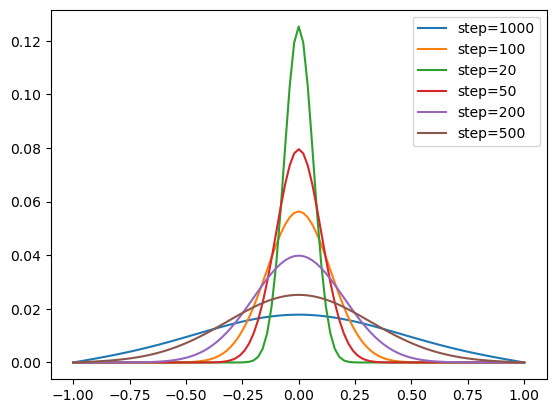

In [3]:
import pylab as plt
import numpy as np 

N=101
dx=2./(N-1)
dt=0.1
D=1./4*(dx**2)/dt
class diffusion:
    def __init__(self,step):
        self.step=step
        self.x=np.linspace(-1,1,N)
        self.y=np.linspace(0,0,N)
        self.old_y=np.linspace(0,0,N)
        self.y[50]=1
    def update(self):
        for i in range(N):
            self.old_y[i]=self.y[i]
        for i in range(1,N-1):
            self.y[i]=self.old_y[i]+D*dt/(dx**2)*(self.old_y[i+1]+self.old_y[i-1]-2*self.old_y[i])
    def fire(self):
        for i in range(self.step):
            self.update()
            i+=1
        plt.plot(self.x,self.y,label="step="+str(self.step))

A=diffusion(1000)
A.fire()
A=diffusion(100)
A.fire()
A=diffusion(20)
A.fire()
A=diffusion(50)
A.fire()
A=diffusion(200)
A.fire()
A=diffusion(500)
A.fire()
plt.legend(loc="best")
plt.show()

### 3.2 How the cream melt.

/tmp/ipykernel_319/4121528722.py:59: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


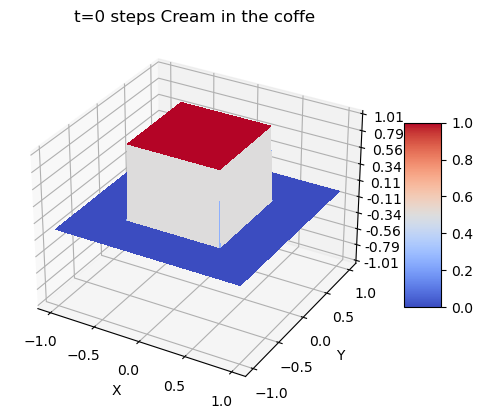

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import random

N=100
accuracy=1e-10
class Fields:
	def __init__(self):
		self.v=[]
		self.old_v=[]
		for i in range(N):
			self.v.append([])
			self.old_v.append([])

		for i in range(N):
			for j in range(N):
				self.v[i].append(0)
				self.old_v[i].append(0)

		for i in range(int(N/4),int(3*N/4)):
			for j in range(int(N/4),int(3*N/4)):
				self.v[i][j]=1

	def update(self):
		self.Delta_v=0.
		for i in range(N):
			self.v[i][0]=0
			self.v[i][N-1]=0

		for j in range(N):
			self.v[0][j]=0
			self.v[N-1][j]=0

		for i in range(N):
			for j in range(N):
				self.old_v[i][j]=self.v[i][j]


		for i in range(1,N-1):
			for j in range(1,N-1):
				self.v[i][j]=(self.old_v[i+1][j]+self.old_v[i-1][j]+self.old_v[i][j+1]+self.old_v[i][j-1])/4.

	def fire(self):
		counter=0
		for i in range(0):
			self.update()
			counter+=1
			i+=1

		return self.v

Super=Fields()
Soup=Super.fire()

fig = plt.figure()
ax = fig.gca(projection='3d')
x=np.linspace(-1,1,N)
y=np.linspace(-1,1,N)
x, y = np.meshgrid(x, y)
surf = ax.plot_surface(np.array(x),np.array(y), np.array(Soup), rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("t=0 steps Cream in the coffe")

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

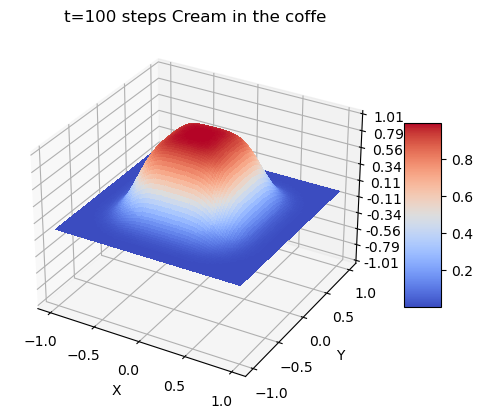

In [5]:
from IPython.display import Image
Image(filename="Random_cream_melt_Output_t=100.png")

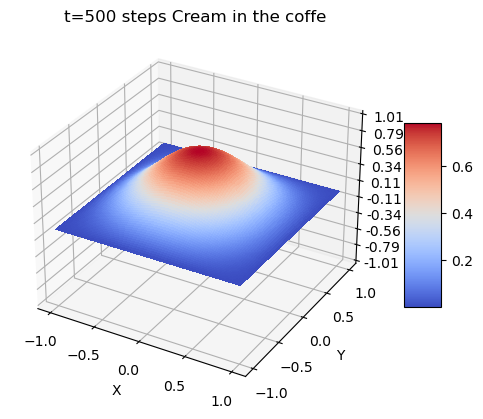

In [6]:
Image(filename="Random_cream_melt_Output_t=500.png")

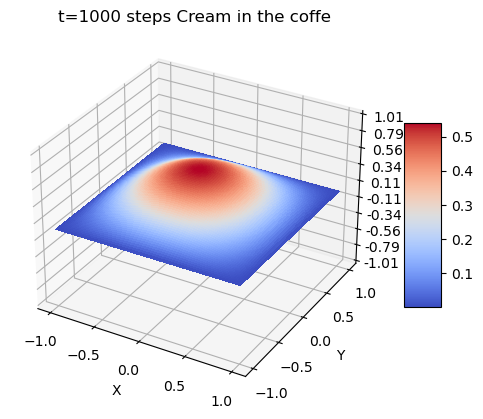

In [7]:
Image(filename="Random_cream_melt_Output_t=1000.png")

#### 至此，我们可以看到完整的How cream melt in coffee

### 3.3利用K-means解决一道有趣的问题（题目来源2022下半年数维杯比赛最新试题B[http://www.nmmcm.org.cn/match_detail/24]）：<p>Consider the following simplification of the Red VS. Blue war problem: assuming that the Red and the Blue are engaged in the battle as shown in Figure 1, the two parties can only conduct the initial platoon in the position with the same color, and each node has its own attack difficulty. The more difficult the attack is, the larger the circle radius in Figure 1, you need to provide the optimal battle strategy for each party based on the actual number and characteristics of the two parties' military weapons.<p>The main fighting units on both sides are infantry, and the main weapons are light tanks with mobility and concealment, medium tanks with balanced firepower and mobility, heavy tanks with heavy armor and powerful firepower, self-propelled artillery with ultra-long-range striking ability and powerful fire support, strategic bombers (not too many units should be deployed to prevent bombing) and anti-aircraft artillery (each side can set up 10 anti-aircraft points). The Red has 1.25 million infantry, 500 drones, 180 heavy tanks, 300 medium tanks, 420 light tanks and 7000<p>self-propelled guns. The Blue has 1 million infantry, 300 drones, 340 heavy tanks, 570 medium tanks, 800 light tanks, and 14,000 self-propelled guns. See Attachment 2 for the specific parameters of the Red and the Blue weapons. Please solve the following three problems through appropriate simplified assumptions and mathematical modeling methods:<p>Question : Based on the data in Annex 1 and Annex 2, and considering the attack difficulty, march distance, weapon range and air defense deployment of each node, please work out the assigned positions and quantity scale of infantry, tanks, self-propelled artillery and air defense

#### 3.3.1问题的分析和思路：
#### 关键在于在进行武器部署的时候需要考虑节点的攻击难度、行军距离和武器射程。因此首先应该考虑的问题是这些因素是如何影响到武器的部署的。假设现在我们已知全部节点的攻击难度。<p>由于指挥部是一场战争中最重要的存在，因此在战争中应该优先保证指挥部的安全，将指挥阵地部署在节点攻击难度最大的地方。那么自然地，指挥阵地的替代阵地应该是攻击难度排名仅次于真实指挥阵地的那些节点。由于指挥阵地很有可能成为地方战略轰炸机的首要攻击目标，因此应该考虑将防空火炮布置在最有可能成为指挥阵地的所有节点处，即攻击难度排名前十的节点。


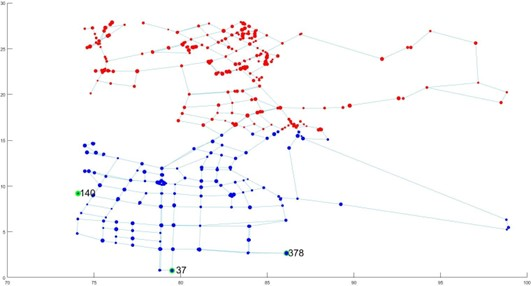

In [29]:
# red and blue range picture
Image(filename="Kmeans_question_picture.jpg")

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import patches

In [10]:
#读取数据
sheet1=pd.read_excel(r'/home/jesse_chen/anaconda3/A_computer_science/Computer_sience_homework/期末大作业/Annex1：node＆link.xlsx',sheet_name='Sheet1')
sheet2=pd.read_excel(r'/home/jesse_chen/anaconda3/A_computer_science/Computer_sience_homework/期末大作业/Annex1：node＆link.xlsx',sheet_name='Sheet2')
nodes=np.array(sheet1)
red=nodes[nodes[:,3]=='red']
blue=nodes[nodes[:,3]=='blue']
lines=np.array(sheet2)

#### 3.3.2模型预处理
#### 为了更好地进行分析，首先我们需要绘制一张可视化的节点分布图。由于红蓝双方所有节点的横纵坐标值均已给出，因此只需在坐标系中进行可视化绘制——用红蓝两种颜色的点表示红蓝双方，用点的大小代表攻击的难度。接着，我们可以计算出红蓝双方直接相连节点的纵坐标平均值，并将其作为红蓝双方的战争前线，如下图所示

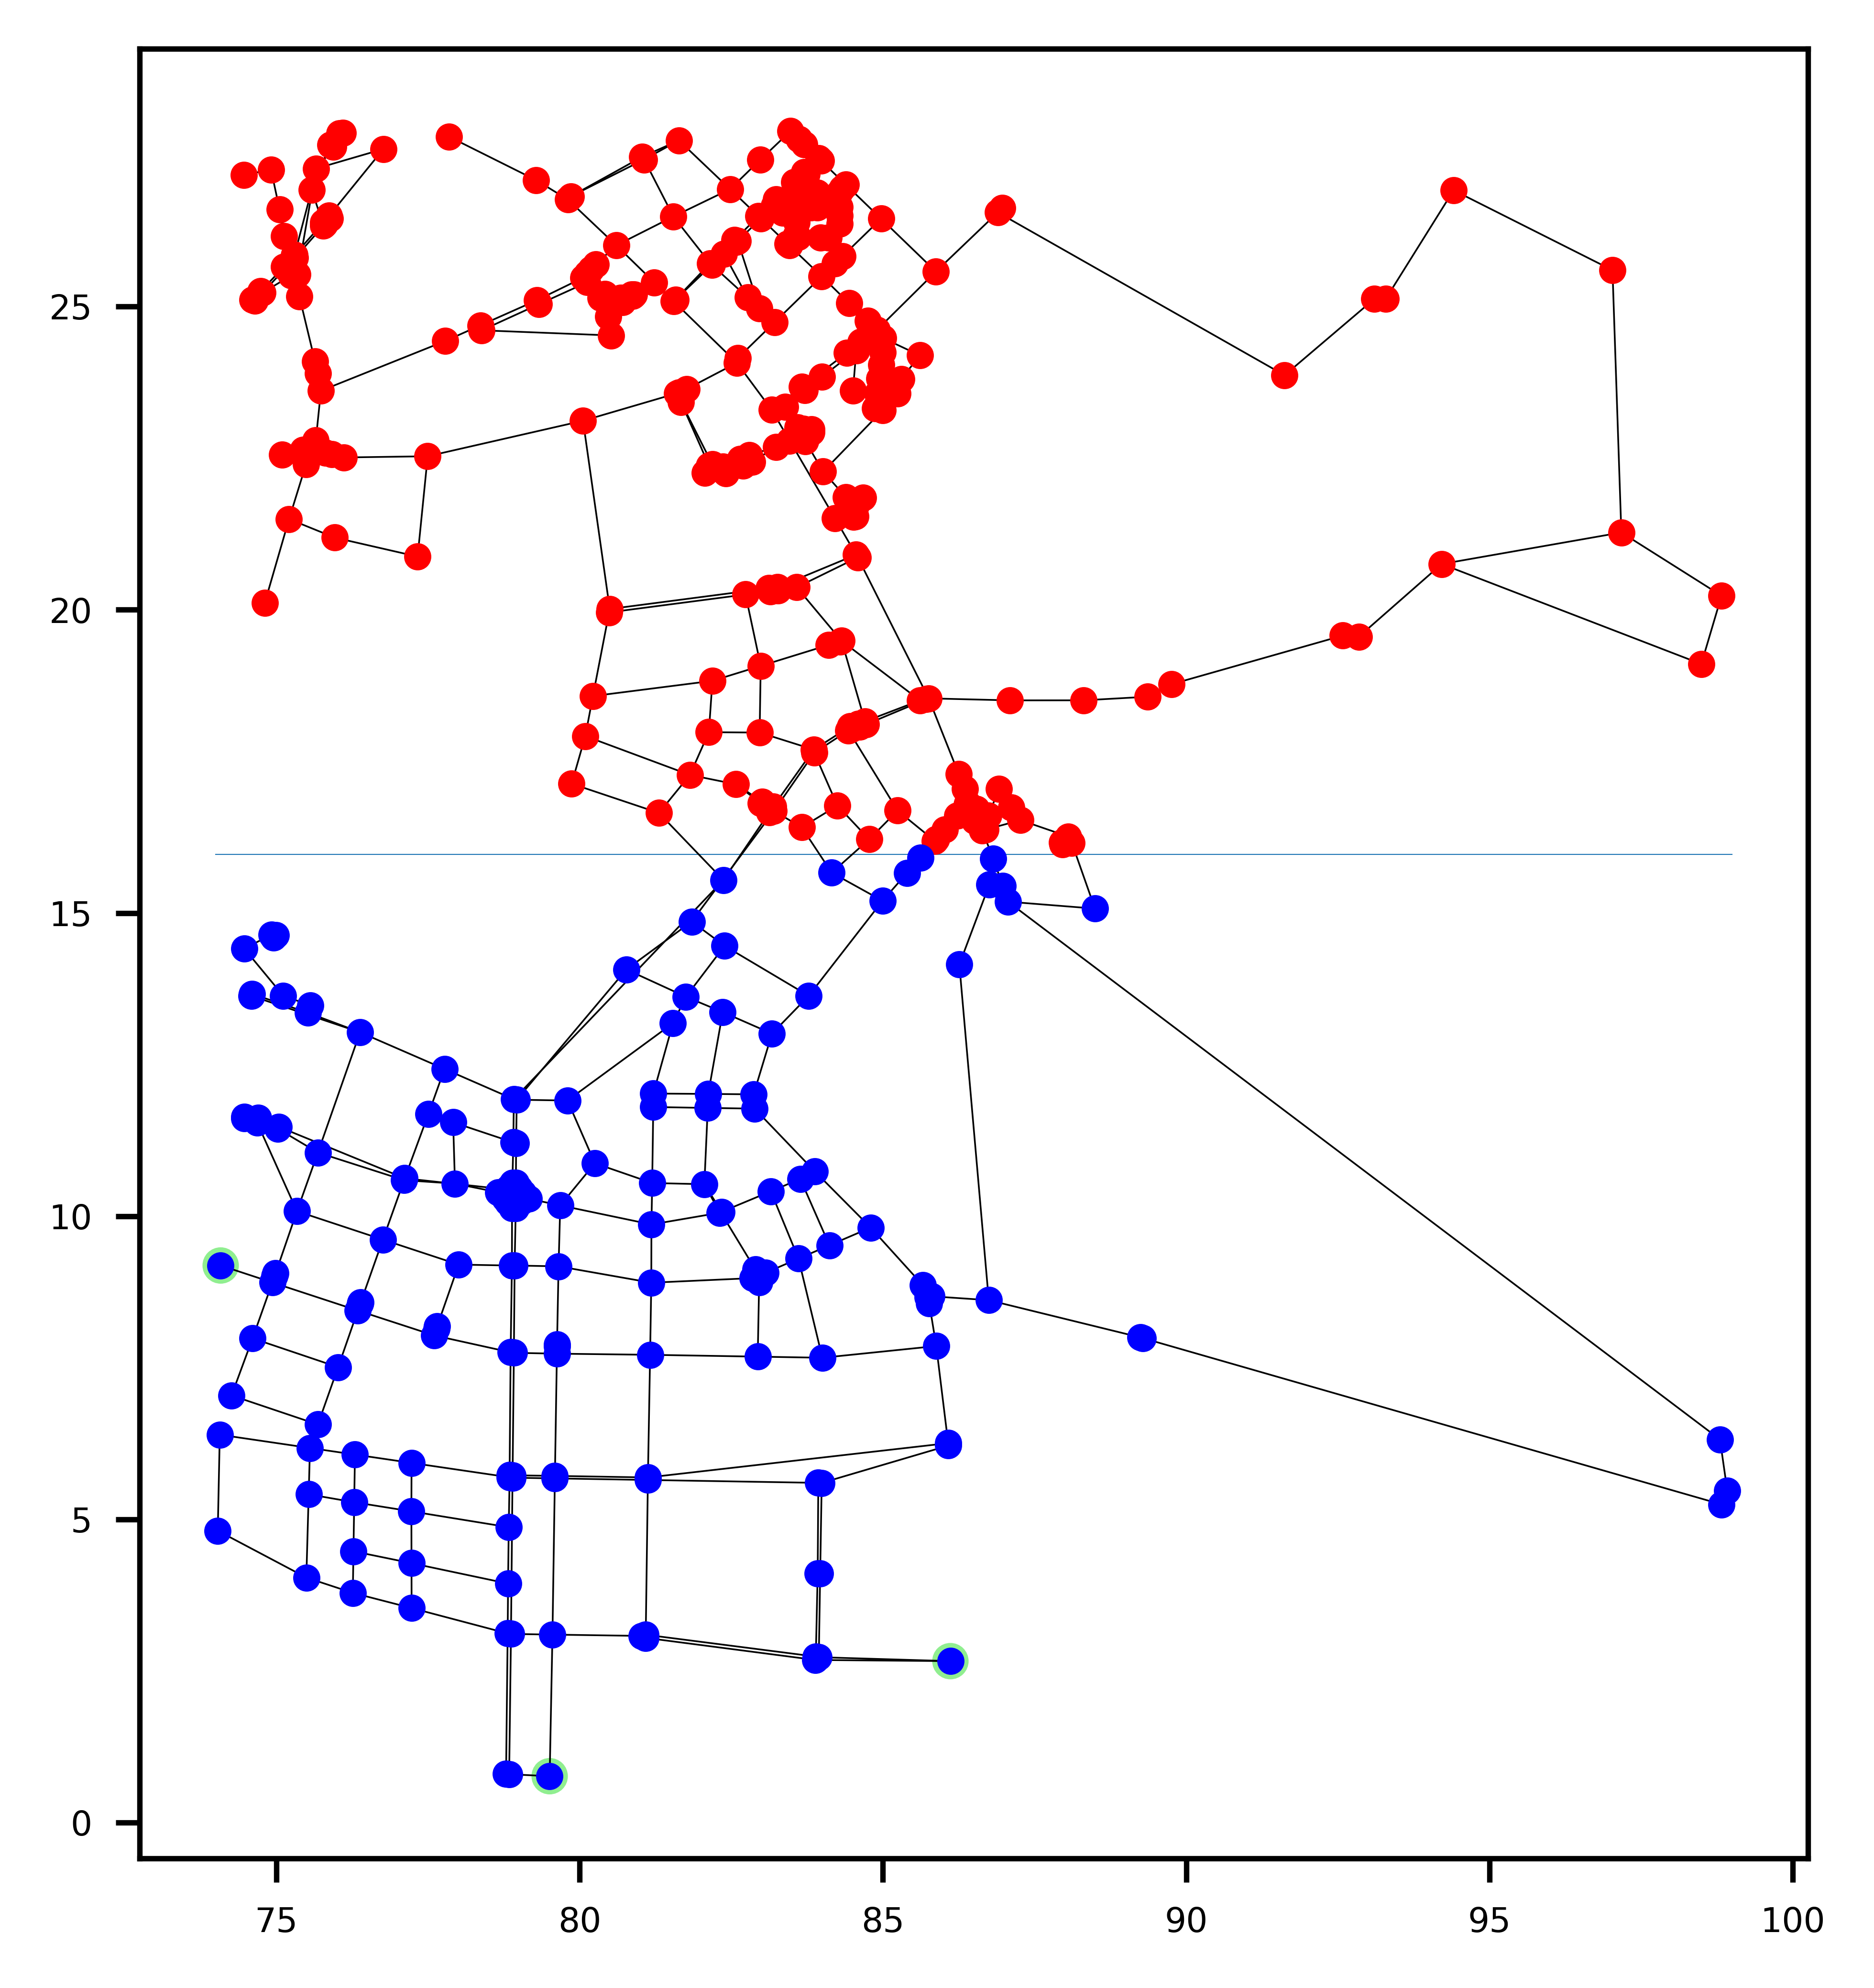

In [36]:
#1前线纵坐标的确定
side=0
sidenum=0
for i in range(lines.shape[0]):
    if(nodes[lines[i,1].astype('int')-1,3]!=nodes[lines[i,2].astype('int')-1,3]):
        side+=nodes[lines[i,1].astype('int')-1,2]+nodes[lines[i,2].astype('int')-1,2]
        sidenum+=2
side=side/sidenum

#绘制visual节点分布图
fig,ax=plt.subplots(1,1,dpi=1024)
#plt.title("Feature importances", fontsize=10)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
ax.set_aspect('equal')

ax.plot(np.arange(74,100,step=1),np.full(26,side),'-',linewidth=0.15)

ax.add_artist(patches.Circle((nodes[139,1],nodes[139,2]),radius=0.3,facecolor='lightgreen'))
ax.add_artist(patches.Circle((nodes[36,1],nodes[36,2]),radius=0.3,facecolor='lightgreen'))
ax.add_artist(patches.Circle((nodes[377,1],nodes[377,2]),radius=0.3,facecolor='lightgreen'))
for i in range(red.shape[0]):
    ax.add_artist(patches.Circle((red[i,1],red[i,2]),radius=0.05+red[i,4]/10,facecolor='red'))
for i in range(blue.shape[0]):
    ax.add_artist(patches.Circle((blue[i,1],blue[i,2]),radius=0.05+blue[i,4]/10,facecolor='blue'))
for i in range(lines.shape[0]):
    ax.plot(nodes[lines[i,1:3].astype('int')-1,1],nodes[lines[i,1:3].astype('int')-1,2],'-',color='black',linewidth=0.25)
ax.plot(red[:,1],red[:,2],'.',color='red')
ax.plot(blue[:,1],blue[:,2],'.',color='blue')
plt.show()

In [12]:
#所有节点连线的平均长度（实际）
average=np.mean(lines[:,3])
print(average)

5.518364510779437


In [13]:
def distance(node1,node2):
    return np.linalg.norm(node1-node2)
def closest_node(node,red_node,blue_node,choose='red'):
    temp=[]
    if(choose=='red'):
        for i in range(red_node.shape[0]):
            temp=np.append(temp,distance(node,red_node[i,1:3]))
    if(choose=='blue'):
        for i in range(blue_node.shape[0]):
            temp=np.append(temp,distance(node,blue_node[i,1:3]))
    return np.argmin(temp),temp

In [30]:
#图上距离比实际距离的平均值

tempp=0
for i in range(lines.shape[0]):
    tempp+=distance(nodes[lines[i,1].astype('int')-1,1:3],nodes[lines[i,2].astype('int')-1,1:3])/lines[i,3]
    #print(distance(nodes[lines[i,1].astype('int')-1,1:3],nodes[lines[i,2].astype('int')-1,1:3])/lines[i,3])
ratio=tempp/lines.shape[0]
print("ratio:",ratio)

def cost_func(centroids,X,idx,side=side):
    m=X.shape[0]
    a=1
    b=1
    c=1
    d=1
    sum_distance=0
    sum_toside=0
    for i in range(X.shape[0]):
        sum_distance+=np.square(np.linalg.norm(X[i]-centroids[idx[i]]))
        sum_toside+=np.square(X[i,1]-side)
    return a/m*sum_distance+0.01/m*sum_toside

def draw_line(p1, p2, style="-k", color='black',linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]],"-", color="black",linewidth=linewidth)

def plot_data_points(X, idx):
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], c=idx)
    
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='black', linewidths=1)
    
    # Plot the examples
    #plot_data_points(X, idx)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :],linewidth=0.3)
    
    plt.title("Iteration number %d" %i)

ratio: 0.1491574713360896


#### 3.3.3 K-means cluster analysis <p>由于红蓝双方的节点数量非常之多，因此我们希望能够通过给点进行分类的方式进行模型的简化。这里我们使用了K-means聚类算法，即通过在全平面随机取点再进行多次分类迭代的方式实现点的分类，取迭代次数为10。在进行10次迭代以后我们将在平面上获得k个聚类点。由于通过迭代获得的聚类点不一定是节点，因此我们以该聚类点为中心，以在预处理中计算得到的所有节点间的平均距离的二倍作为半径画圆，则圆中将有节点被包括进来。我们取所有被包括的节点中攻击难度最高的一个节点作为聚类点。

In [17]:
#K-Means算法实现
def kMeans(X,K,max_iters=10,plot_progress=True,side=side,a=1,b=0.1,c=-0.1,choose='red'):
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    previous_centroids = centroids
    idx = np.zeros(X.shape[0], dtype=int)
    m, n = X.shape
    
    closest_id,all_distance=0,[]
    
    for i in range(max_iters):
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        #print(" Cost: %f"%cost_func(centroids,X,idx))
        
        # For each example in X, assign it to the closest centroid
        for j in range(m):
            distance=[]
            for k in range(K):
                closest_id,all_distance=closest_node(centroids[k],red,blue,choose=choose)
                index=np.argwhere(all_distance<(2*average*ratio))
                if(choose=='red'):
                    distance=np.append(distance,a*np.linalg.norm(X[j]-centroids[k])+b*np.abs(centroids[k,1]-side)+c*np.sum(red[index,4]))
                if(choose=='blue'):
                    distance=np.append(distance,a*np.linalg.norm(X[j]-centroids[k])+b*np.abs(centroids[k,1]-side)+c*np.sum(blue[index,4]))
            idx[j]=np.argmin(distance)

        # Optionally plot progress
        if plot_progress:
            if(i==max_iters-1):
                plot_data_points(X, idx)
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, j)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        for k in range(K):   
            points = X[idx == k]
            centroids[k] = np.mean(points, axis = 0)
    print("Cost : %f"%cost_func(centroids,X,idx))
    return centroids,idx
    

In [18]:
def judge(centroids,idx,K,choose='red'):
    sum=0
    if(choose=='red'):
        for i in range(K):
            sum+=np.sum(1/closest_node(centroids[i],red,blue,choose='red')[1])
    print(sum)

#### 3.3.4 arrange<p>通过计算我们发现在红方取k=4，蓝方取k=5时迭代后的结果最为稳定，因此便将红方的节点分为4类，将蓝方的节点分为5类。在红方的4个点和蓝方的5个点中，分别由攻击难度最高的点作为该方的指挥阵地，其余的聚类点作为备选的指挥阵地，备选顺序按照攻击难度从高到低即可。由于在该问题中点的分类并非仅仅考虑了距离的因素，还应将行军距离和攻击难度的要素考虑进来，因此需要对cost function进行修改，在其中添加进行军距离和攻击难度的要素。其中，由于问题为静态问题，因此行军距离暂不考虑节点间的路径，仅认为是节点到前线的距离。分类完成后如下图所示。

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Cost : 10.590954


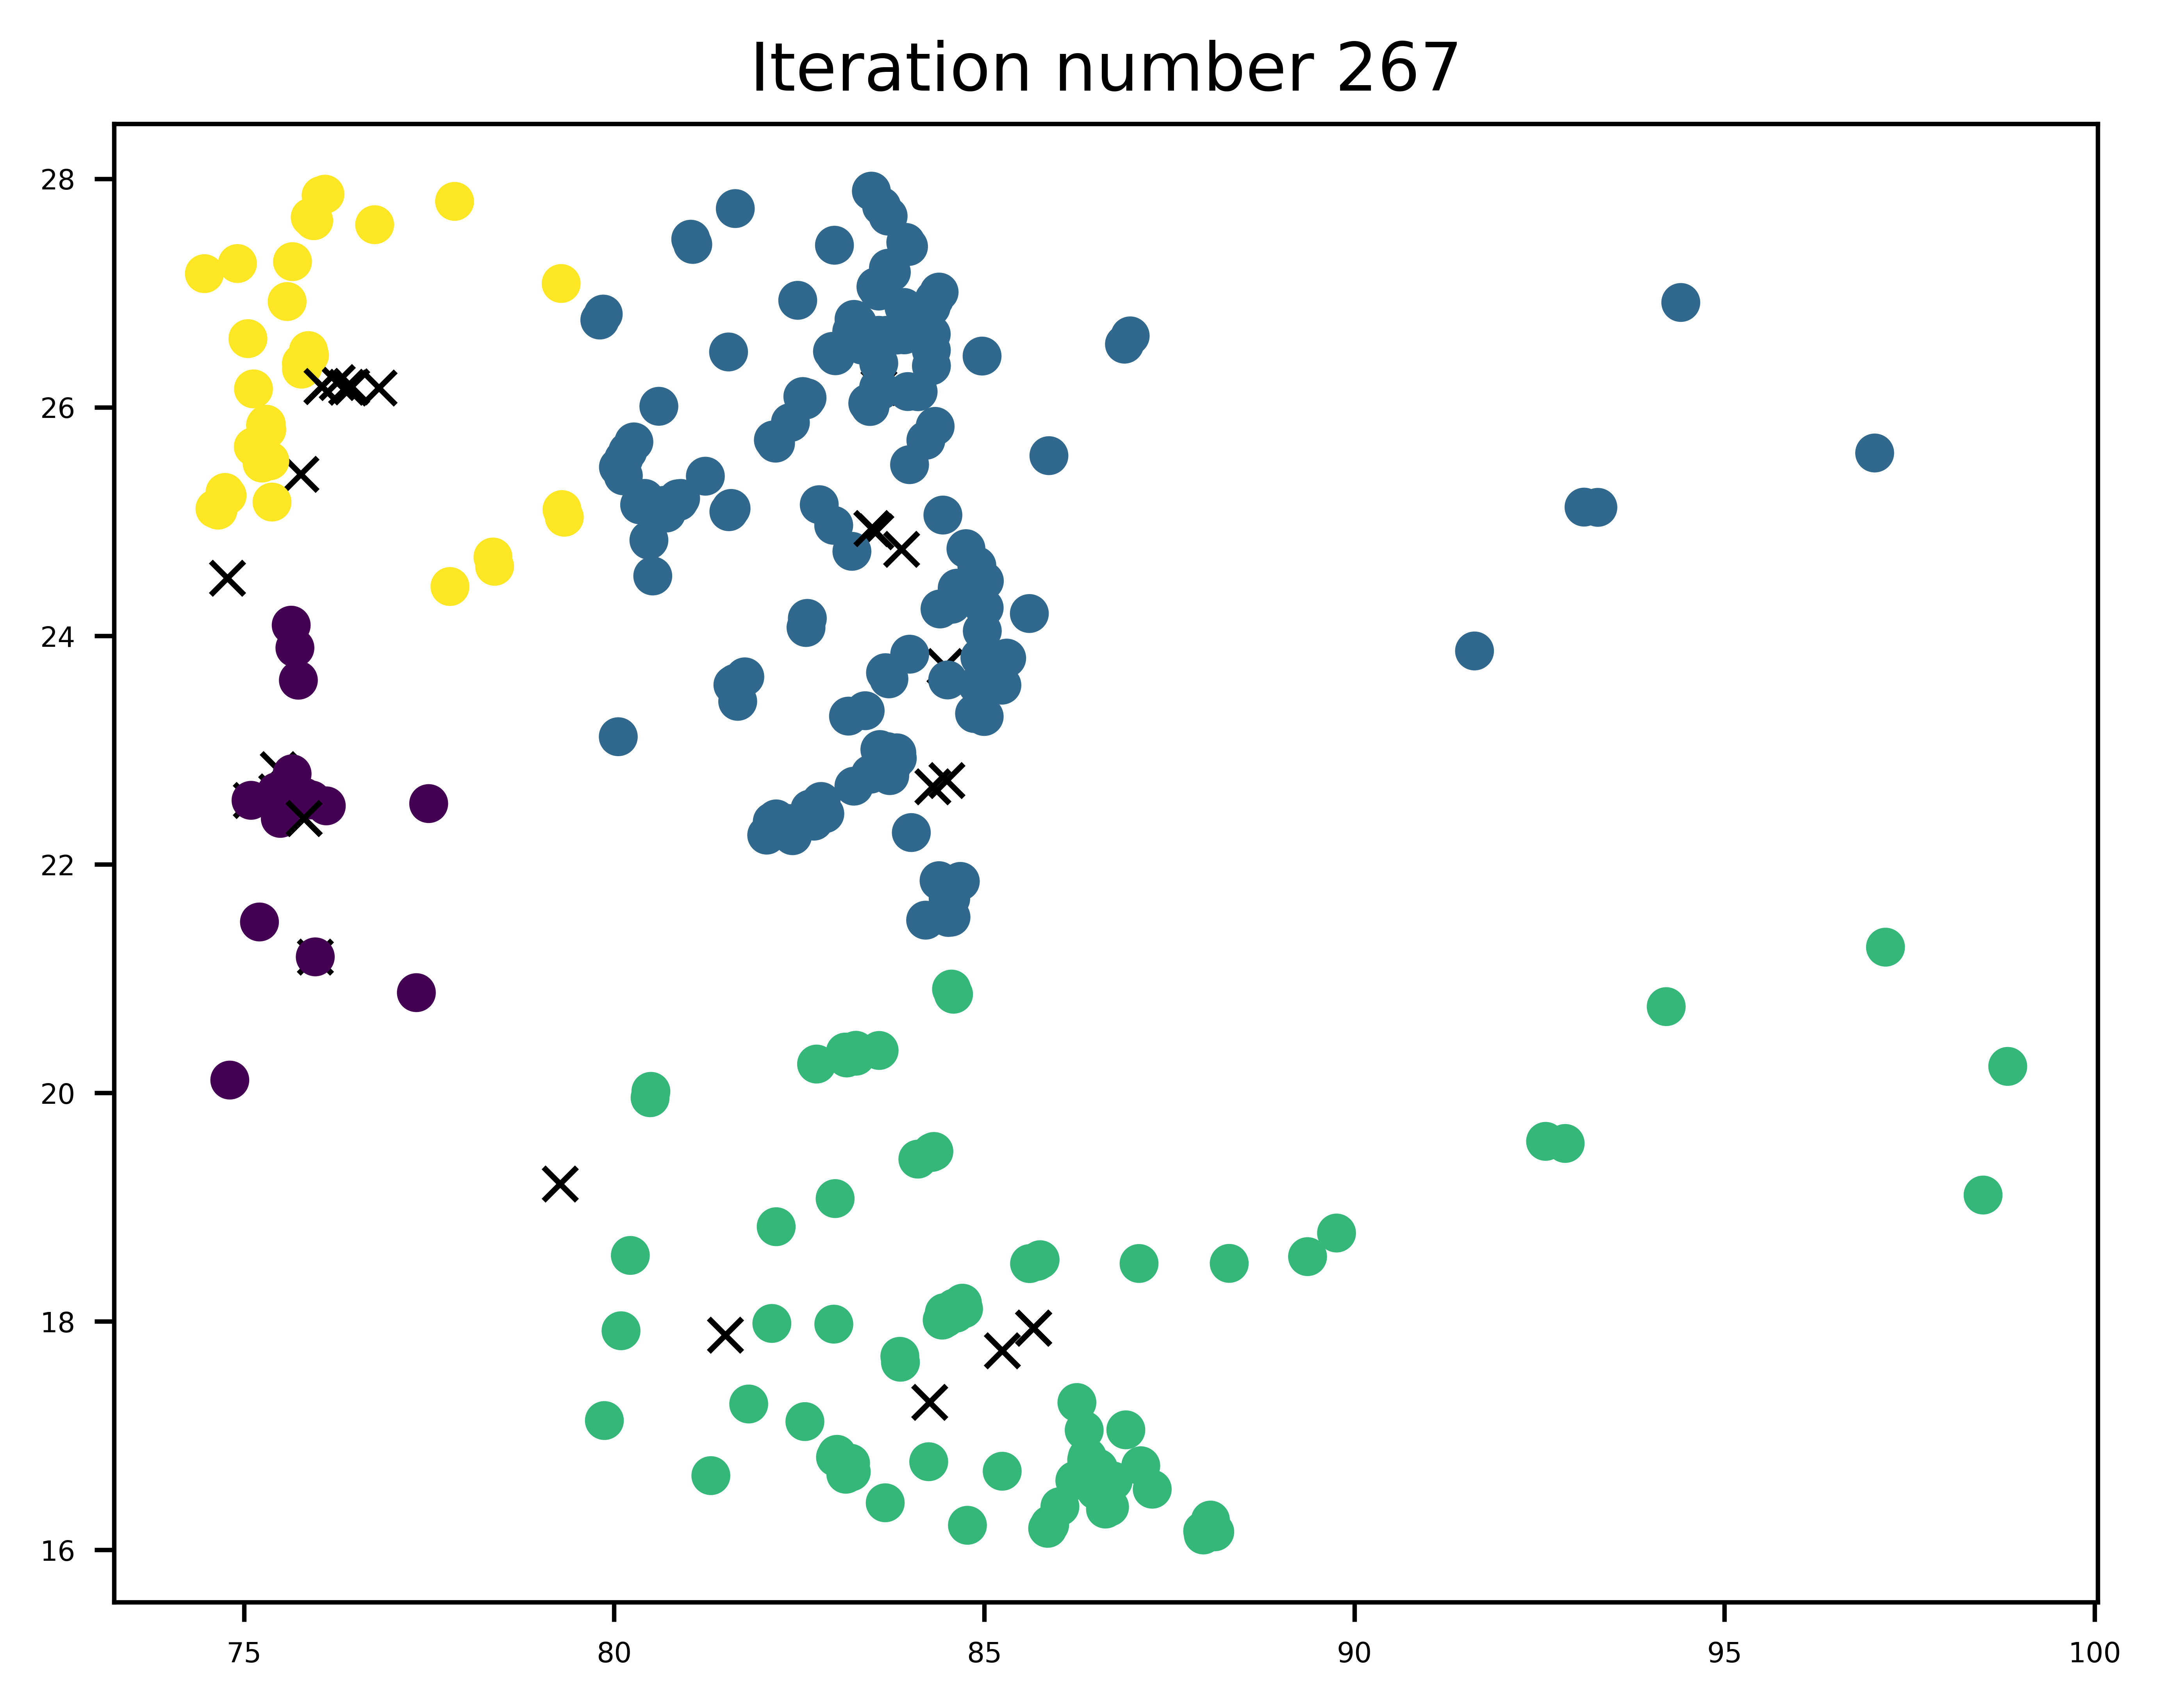

286.5334532852276


In [19]:
K_red=4
plt.subplots(1,1,dpi=1024)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
red_centroids, red_idx = kMeans(red[:,1:3],K_red,choose='red')
plt.show()
judge(red_centroids, red_idx,K_red)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Cost : 10.306410


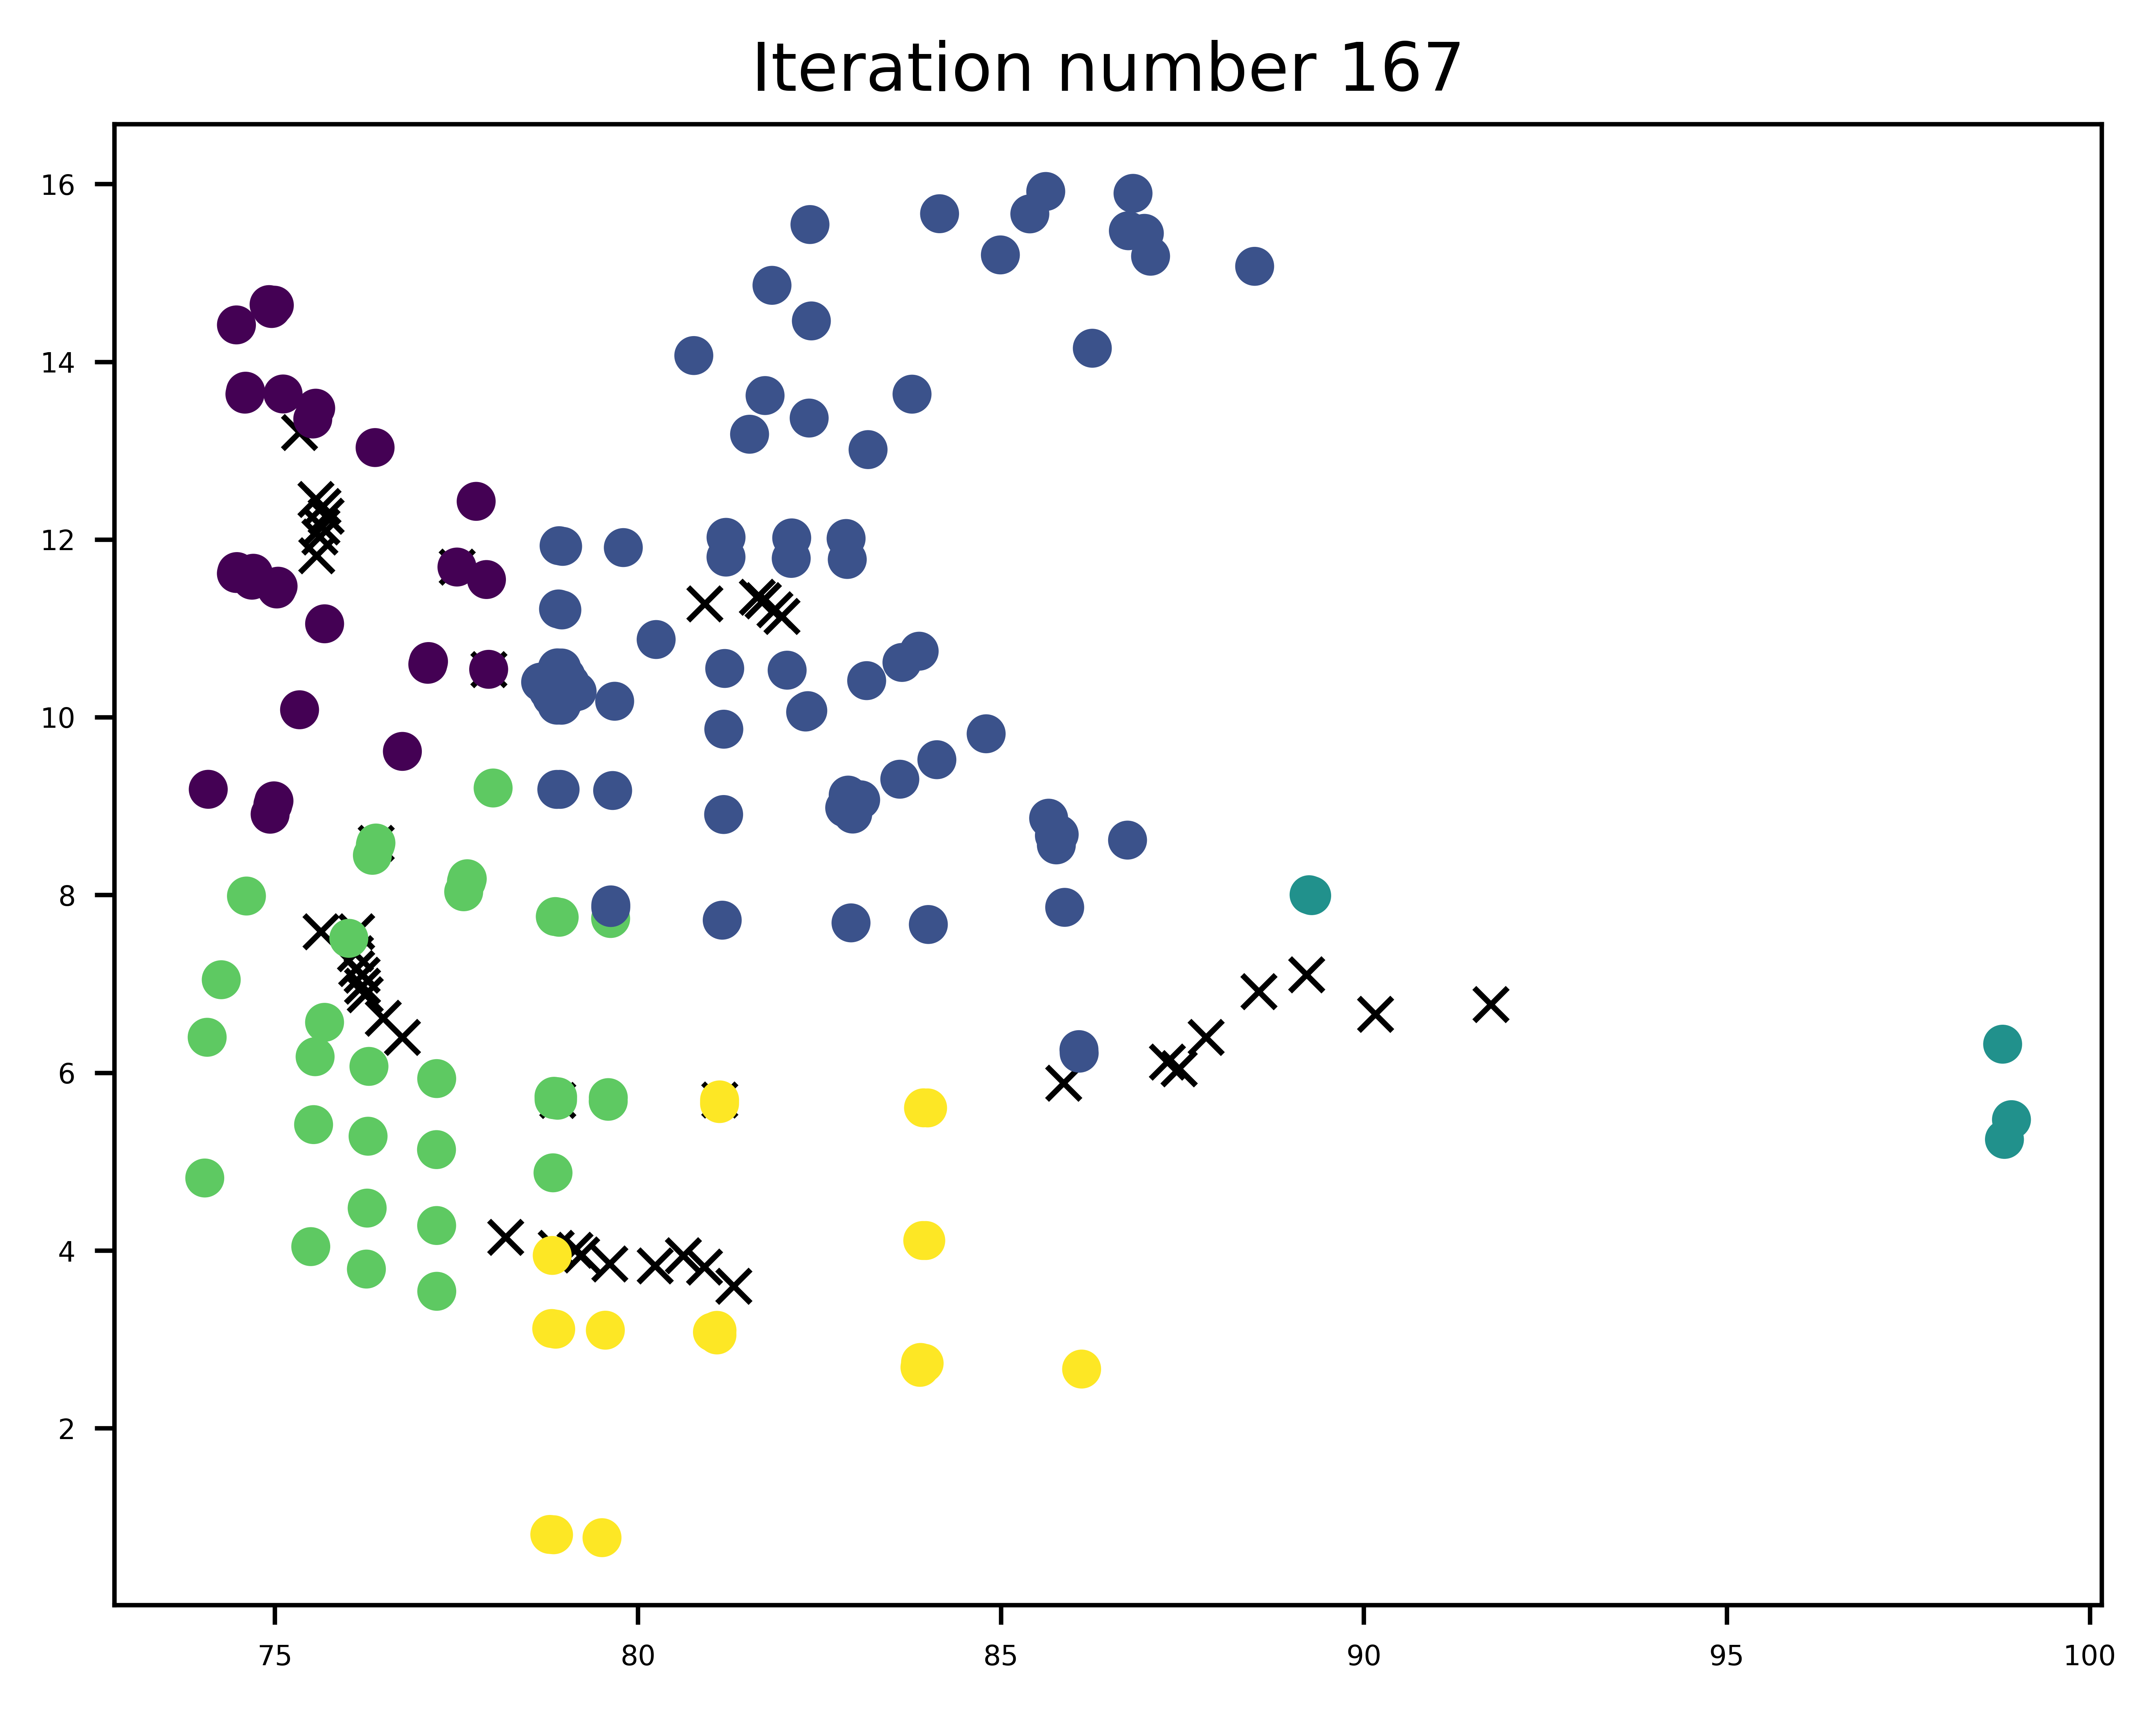

In [20]:
K_blue=5
plt.subplots(1,1,dpi=1024)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
blue_centroids, blue_idx = kMeans(blue[:,1:3],K_blue,choose='blue')
plt.show()

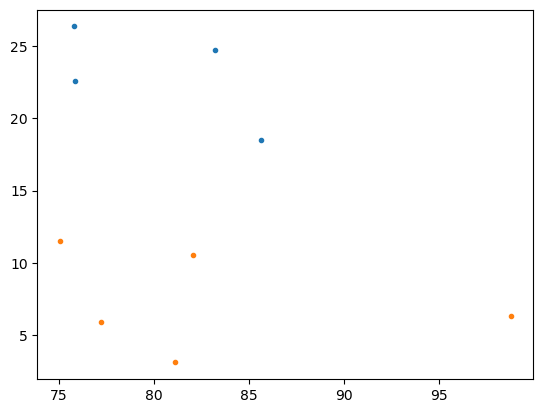

In [32]:
#预选的红方指挥中心的位置
red_closest=[]
for i in range(red_centroids.shape[0]):
    id=closest_node(red_centroids[i],red,blue,choose='red')[0]
    red_closest=np.append(red_closest,[red[id]])
red_center=red_closest.reshape(red_centroids.shape[0],5)
plt.plot(red_closest.reshape(red_centroids.shape[0],5)[:,1],red_closest.reshape(red_centroids.shape[0],5)[:,2],'.')

#预选的蓝方指挥中心的位置
blue_closest=[]
for i in range(blue_centroids.shape[0]):
    id=closest_node(blue_centroids[i],blue,blue,choose='blue')[0]
    blue_closest=np.append(blue_closest,[blue[id]])
blue_center=blue_closest.reshape(blue_centroids.shape[0],5)
plt.plot(blue_closest.reshape(blue_centroids.shape[0],5)[:,1],blue_closest.reshape(blue_centroids.shape[0],5)[:,2],'.')


In [33]:
def gaussian(X,sigma=1):
    X=X.astype('float64')
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-X**2/(2*sigma**2))
##运用高斯分布
#red
gaussian_infantry_sum=np.zeros(red.shape[0],dtype='float64')
for i in range(red_centroids.shape[0]):
    gaussian_infantry_sum+=gaussian(closest_node(red_centroids[i],red,blue,choose='red')[1])
red_infantry_sum=np.sum(gaussian_infantry_sum)
red_result=np.array([gaussian_infantry_sum/red_infantry_sum*1250000,])
#print(red_result.astype('int'))

gaussian_tank_sum=np.zeros(red.shape[0],dtype='float64')
for i in range(red_centroids.shape[0]):
    gaussian_tank_sum+=gaussian(closest_node(red_centroids[i],red,blue,choose='red')[1],sigma=0.8)
red_tank_sum=np.sum(gaussian_tank_sum)
red_result=np.append(red_result,[gaussian_tank_sum/red_tank_sum*180],axis=0)
red_result=np.append(red_result,[gaussian_tank_sum/red_tank_sum*300],axis=0)
red_result=np.append(red_result,[gaussian_tank_sum/red_tank_sum*420],axis=0)
#print(red_result.astype('int'))

gaussian_gun_sum=np.zeros(red.shape[0],dtype='float64')
for i in range(red_centroids.shape[0]):
    gaussian_gun_sum+=gaussian(np.abs(red[:,2]-side)/ratio,sigma=5.14)
red_gun_sum=np.sum(gaussian_gun_sum)
red_result=np.append(red_result,[gaussian_gun_sum/red_gun_sum*7000],axis=0)

#判断误差，确定sigma的值
judge1=red_result[4].astype('int')!=0
judge2=np.abs(red[:,2]-side)/ratio<17.23
Falsesum=0
for i in range(judge1.shape[0]):
    if(judge1[i]!=judge2[i]):
        Falsesum+=1
print("Cost: %d"%Falsesum)

red_result=red_result.T.astype('int')
red_result=np.append(red,red_result,axis=1)

#blue
gaussian_infantry_sum=np.zeros(blue.shape[0],dtype='float64')
for i in range(blue_centroids.shape[0]):
    gaussian_infantry_sum+=gaussian(closest_node(blue_centroids[i],blue,blue,choose='blue')[1])
blue_infantry_sum=np.sum(gaussian_infantry_sum)
blue_result=np.array([gaussian_infantry_sum/blue_infantry_sum*1000000,])
#print(blue_result.astype('int'))

gaussian_tank_sum=np.zeros(blue.shape[0],dtype='float64')
for i in range(blue_centroids.shape[0]):
    gaussian_tank_sum+=gaussian(closest_node(blue_centroids[i],blue,blue,choose='blue')[1],sigma=0.8)
blue_tank_sum=np.sum(gaussian_tank_sum)
blue_result=np.append(blue_result,[gaussian_tank_sum/blue_tank_sum*340],axis=0)
blue_result=np.append(blue_result,[gaussian_tank_sum/blue_tank_sum*570],axis=0)
blue_result=np.append(blue_result,[gaussian_tank_sum/blue_tank_sum*800],axis=0)
#print(blue_result.astype('int'))

gaussian_gun_sum=np.zeros(blue.shape[0],dtype='float64')
for i in range(blue_centroids.shape[0]):
    gaussian_gun_sum+=gaussian(np.abs(blue[:,2]-side)/ratio,sigma=3.6)
blue_gun_sum=np.sum(gaussian_gun_sum)
blue_result=np.append(blue_result,[gaussian_gun_sum/blue_gun_sum*14000],axis=0)

#判断误差，确定sigma的值
judge1=blue_result[4].astype('int')!=0
judge2=np.abs(blue[:,2]-side)/ratio<13.25
Falsesum=0
for i in range(judge1.shape[0]):
    if(judge1[i]!=judge2[i]):
        Falsesum+=1
print("Cost: %d"%Falsesum)

blue_result=blue_result.T.astype('int')
blue_result=np.append(blue,blue_result,axis=1)

Cost: 0
Cost: 0


In [26]:
#红方分配
print(red_result)
#蓝方分配
print(blue_result)

[[1 74.6492750000023 25.1005333333344 ... 0 0 0]
 [2 86.2242500000008 16.6076666666678 ... 1 1 191]
 [3 86.0222750000013 16.3790999999994 ... 0 1 234]
 ...
 [425 84.5511750000014 21.5383999999996 ... 0 0 0]
 [426 84.5064250000007 23.6142666666671 ... 0 1 0]
 [427 85.6097250000012 24.1956000000011 ... 0 0 0]]
[[25 84.0019250000026 7.66740000000018 ... 0 0 0]
 [26 83.6087750000019 9.30226666666556 ... 0 0 0]
 [27 83.1522749999998 10.4116 ... 12 17 0]
 ...
 [434 78.8388750000024 0.800533333332965 ... 0 0 0]
 [435 75.044400000003 11.4740666666672 ... 25 35 0]
 [436 74.4767500000023 11.6387666666663 ... 13 18 0]]


In [27]:
#红方指挥中心基本状况&兵力
print(red_result[[147,44,83,192],:])
#蓝方指挥中心基本状况&兵力
print(blue_result[[99,153,162,137,24],:])

[[250 85.6124250000008 18.5061333333323 'red' 0.57 16930 3 5 7 1]
 [136 75.6383000000014 24.0935666666668 'red' 0.44 6752 0 0 1 0]
 [185 83.2127000000007 24.7399666666676 'red' 0.3 18803 3 6 9 0]
 [316 77.8452500000029 27.8028333333324 'red' 0.55 1079 0 0 0 0]]
[[163 77.1167000000013 10.6264333333333 'blue' 0.74 5925 1 1 2 0]
 [383 83.9250250000028 4.11146666666677 'blue' 0.91 2022 0 0 0 0]
 [431 77.2267500000012 5.13436666666678 'blue' 0.65 18655 6 10 14 0]
 [348 98.9221250000014 5.47139999999994 'blue' 0.65 10 0 0 0 0]
 [49 83.8754750000028 10.7428333333341 'blue' 0.07 9025 2 3 4 0]]


In [28]:
#输出文件
data1=pd.DataFrame(red_result)
data2=pd.DataFrame(blue_result)
data3=pd.DataFrame(red_result[[147,44,83,192],:])
data4=pd.DataFrame(blue_result[[99,153,162,137,24],:])

writer=pd.ExcelWriter('Q1_outputs.xlsx')
data1.to_excel(writer,'red_result',float_format='%.5f')
data2.to_excel(writer,'blue_result',float_format='%.5f')
data3.to_excel(writer,'red_center',float_format='%.5f')
data4.to_excel(writer,'blue_center',float_format='%.5f')

writer.save()

#### 3.3.5我们得到了较优的各节点部署策略

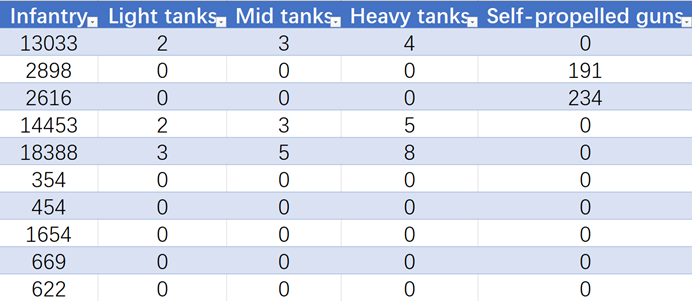

In [37]:
Image(filename="Kmeans_red_blue_range.png") #部分结果的输出

## 4、总结

### 4.1 Diffusion
##### From the figure 3.1, we can see that the the displacement perfectly satisfy the Gaussian distribution. As the staps increases, the $\sigma$ becomes larger. Distribution function:$$\rho(x,t)=\frac {1}{\sigma}exp\left[{-\frac{x^2}{2\sigma ^2}}\right]$$ $$\sigma=\sqrt {2Dt}$$
### 4.2 The cream in coffe
##### 有点意思，在t=1000 steps左右基本melt，可以通过比较soup值得到何时融化的条件.
### 4.3 K-means appliance
##### 可以看到我们通过简化假设成功地应用K-means建立了模型:<p>我们将步兵和坦克作为一个整体而进行考虑。我们以聚类中心作为高斯函数的峰值零点，向全平面各个方向做一个高斯分布。由于步兵和坦克只能部署在节点处，因此需要将此高斯分布进行离散化。对于平面中的任意一个节点，我们只需计算出所有聚类点在此处的高斯分布值的叠加，即可获得在该点邻域内的概率密度，从而就可以得知应该在该点处分配的兵力值。对于自行火炮的分布，通过计算图上距离与实际距离，我们可以发现它的射程其实是非常短的，因此应该尽量将自行火炮布置在距离前线较近的地方。所以仅考虑自行火炮到前线的直线距离即可。
### 4.4 关于K-means的补充：
#### 4.4.1算法优缺点
##### 优点：容易实现<p>缺点：可能收敛到局部最小值；必须指定簇数量，因为k-means无法从数据中获得簇的数量；k-means 聚类的边界总是线性的,这就意味着当边界很复杂时,算法会失效；在大规模数据集上收敛速度慢，由于 k-means 的每次迭代都必须获取数据集所有的点,因此随着数据量的增加,算法会变得缓慢。适用数据类型：数值型数据。
#### 4.4.1算法问题的解决方案（如K-means中的appliance，我们采用GMM高斯混合模型解决实际了问题）
##### K-means的特点是硬聚类(hard clustering)，即将每个点分配给一个中心，且只能分配给一个(数据点属于某个簇类，要么为0，要么为1)。它的限制是没有提供数据点属于其他簇中心的概率或可能性的衡量方式，而这种软聚类(soft clustering)是GMM的组成部分。<p>高斯混合模型本质上与K-means是一致的，都使用了期望最大化方法，但是也有不同，具体过程如下：<p>随机选择初始簇中心位置和形状<p>重复至收敛<p>期望步骤：为每个点找到对应的每个簇的概率作为权重<p>最大化步骤：更新每个簇的位置，将其标准化,并且基于所有数据点的权重来确定形状。<p>如果K-means一样，高斯混合模型也会收敛在局部最小值，因此也需要多次初始化。<p>高斯混合模型由多个高斯分布组成，每个分布有几个参数组成：均值 ，协方差∑(多变量情况下椭圆体的尺寸)，每个高斯分布对应的概率大小π(所有高斯分布的和为1)

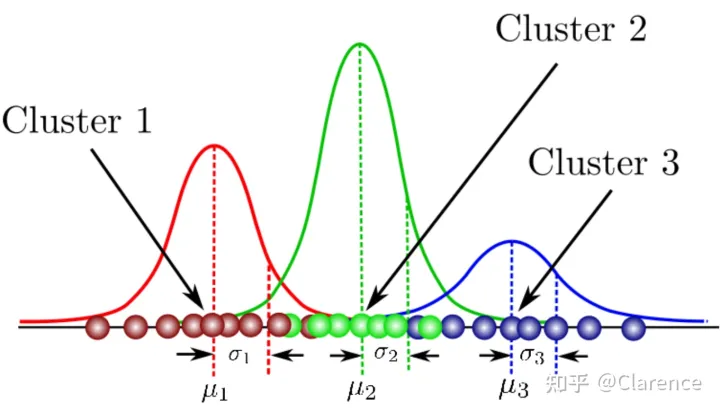

In [35]:
Image(filename="Kmeans_GMM.jpg")#[2]

## 5.Reference
### [1]Computational Physics, 2nd Edition,Nicholas J. Giordano & Hisao Nakanishi, 7th Chapter-Random systems
### [2]K-means_introduction<p>[https://www.w3schools.com/python/python_ml_k-means.asp]

## 6.致谢
### 感谢蔡浩老师的教导！<p>单是引进门：Linux子系统下安装Anaconda环境并使用VSCode进行调试……就已经获益匪浅了。哈哈，没老师那么有幽默细胞……同时也感谢《Computational Physics, 2nd Edition》这本书及其作者： Nicholas J. Giordano & Hisao Nakanishi。